In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
# reshape 2D array to 1D array

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
classes = ["airplane", "automobile", "bird", "cat", 
           "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
# get image and image name from index number

def get_image(X, y, index):
    plt.figure(figsize = (3, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

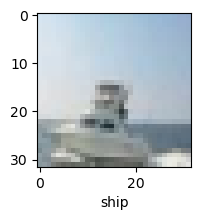

In [10]:
get_image(X_train, y_train, 100)

In [11]:
# normalize X values 

X_train = X_train / 255
X_test = X_test / 255

In [12]:
# Model fitting using ANN

ann = keras.Sequential([
    layers.Input(shape = (32, 32, 3)),
    layers.Flatten(),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 72ms/step - accuracy: 0.3062 - loss: 1.9261
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 74ms/step - accuracy: 0.4182 - loss: 1.6454
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4533 - loss: 1.5465
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.4774 - loss: 1.4766
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.4963 - loss: 1.4293


In [13]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4842 - loss: 1.4574


[1.4656052589416504, 0.47999998927116394]

In [14]:
from sklearn.metrics import classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.38      0.48      1000
           1       0.50      0.71      0.59      1000
           2       0.47      0.23      0.31      1000
           3       0.39      0.28      0.33      1000
           4       0.43      0.41      0.42      1000
           5       0.53      0.20      0.29      1000
           6       0.46      0.67      0.55      1000
           7       0.45      0.66      0.54      1000
           8       0.45      0.77      0.57      1000
           9       0.58      0.48      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [15]:
# Model fitting using CNN

cnn = keras.Sequential([
    layers.Input(shape = (32, 32, 3)),
    
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.3860 - loss: 1.6874
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6038 - loss: 1.1292
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6641 - loss: 0.9689
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6976 - loss: 0.8760
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7211 - loss: 0.8016


In [16]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6953 - loss: 0.8928


[0.9078112244606018, 0.6899999976158142]

In [17]:
y_pred = [np.argmax(i) for i in cnn.predict(X_test)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [18]:
y_pred[: 5]

[3, 8, 1, 0, 6]

In [19]:
y_test[: 5]

array([3, 8, 8, 0, 6], dtype=uint8)